In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.ticker import LogFormatterExponent, FuncFormatter

ZF_ALL = np.load('fits/ZFOURGE_TOTAL.npz', allow_pickle=True)
ZF_SF = np.load('fits/ZFOURGE_SF.npz', allow_pickle=True)
ZF_QUI = np.load('fits/ZFOURGE_QUI.npz', allow_pickle=True)

CG_ALL = np.load('fits/CIGALE_TOTAL.npz', allow_pickle=True)
CG_SF = np.load('fits/CIGALE_SF.npz', allow_pickle=True)
CG_AGN = np.load('fits/CIGALE_AGN.npz', allow_pickle=True)

export = True

# ZFOURGE Luminosity Function & Comparison

[1.1 1.0 0.9 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]


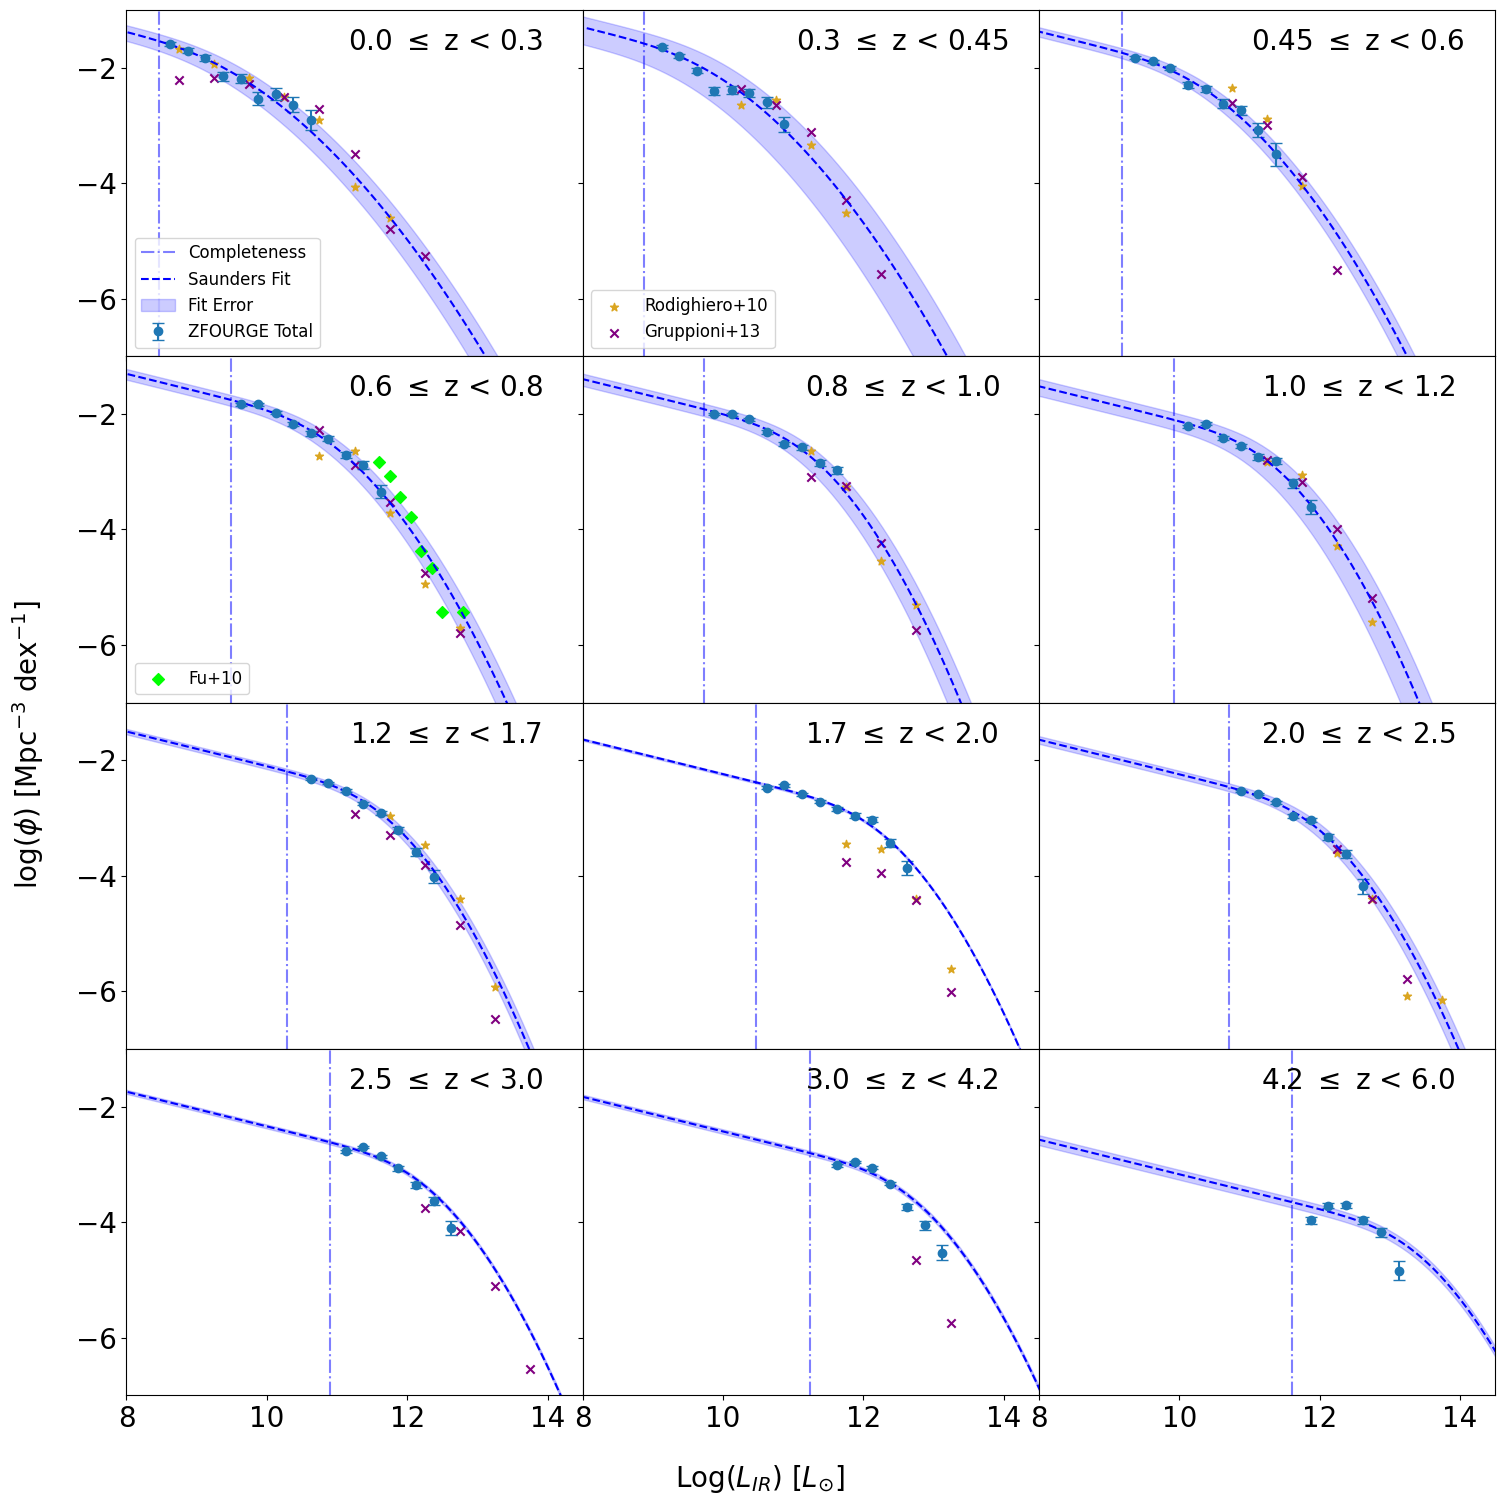

In [26]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()
print(ZF_ALL['s'])

# ZFOURGE Saunders Function
def saunders_luminosity(L, L_star, phi_star, sigma):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# ZFOURGE TOTAL
for i, (ax, l, p, e, params, perr, (z_start, z_end), min_l, sigma) in enumerate(zip(axes, ZF_ALL['x'], ZF_ALL['y'], ZF_ALL['e'], ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['z'], ZF_ALL['m'], ZF_ALL['s'])):

    # Phi values
    yerr = np.array(e) / (np.array(p) * np.log(10))    
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='o', capsize=4, label='ZFOURGE Total' if i == 0 else '', color='C0')
    ax.axvline(np.log10(min_l/(3.83*10**26)), color='blue', linestyle='-.', alpha=0.5, label='Completeness' if i == 0 else "")
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7, fontsize=20)
    ax.set_xticks([8,10,12,14])
    ax.set_yticks([-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlim(8, 14.5)
    ax.set_ylim(-7, -1)

    # Saunders Fit
    l = np.logspace(6, 15, 100)
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *params, sigma)), label='Saunders Fit' if i == 0 else "", color='blue', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *p_down, sigma)), 
        np.log10(saunders_luminosity(l, *p_up, sigma)), 
        color='blue', alpha=0.2, label='Fit Error' if i == 0 else "")

# Rodighiero 
R_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75] # 0 < z < 0.3
R_L_04 =                   [10.25, 10.75, 11.25, 11.75] # 0.3 < z < 0.45
R_L_06 =                          [10.75, 11.25, 11.75] # 0.45 < z < 0.6
R_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
R_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
R_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
R_L_17 =                                        [11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
R_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
R_L_25 =                                               [12.25, 12.75, 13.25, 13.75] # 2 < z < 2.5
R_L = [R_L_03, R_L_04, R_L_06, R_L_08, R_L_10, R_L_12, R_L_17, R_L_20, R_L_25]

R_P_03 = [-1.67, -1.93, -2.17, -2.51, -2.90, -4.07, -4.61] # 0 < z < 0.3
R_P_04 =                      [-2.65, -2.56, -3.34, -4.52] # 0.3 < z < 0.45
R_P_06 =                             [-2.36, -2.89, -4.05] # 0.45 < z < 0.6
R_P_08 =                             [-2.72, -2.64, -3.72, -4.94, -5.7] # 0.6 < z < 0.8
R_P_10 =                                    [-2.64, -3.27, -4.54, -5.3] # 0.8 < z < 1.0
R_P_12 =                                    [-2.83, -3.05, -4.28, -5.6] # 1.0 < z < 1.2
R_P_17 =                                           [-2.97, -3.46, -4.4, -5.92] # 1.2 < z < 1.7
R_P_20 =                                           [-3.45, -3.54, -4.4, -5.61] # 1.7 < z < 2
R_P_25 =                                                  [-3.61, -4.4, -6.09, -6.15] # 2 < z < 2.5
R_P = [R_P_03, R_P_04, R_P_06, R_P_08, R_P_10, R_P_12, R_P_17, R_P_20, R_P_25]

# Gruppioni
G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

# Rodighiero
for i, (ax, lum, phi) in enumerate(zip(axes, R_L, R_P)):
    ax.scatter(lum, phi, color='goldenrod', marker='*', label='Rodighiero+10' if i == 1 else '')
    
# Gruppioni
for i, (ax, lum, phi) in enumerate(zip(axes, G_L, G_P)):
    ax.scatter(lum, phi, color='purple', marker='x', label='Gruppioni+13' if i == 1 else '')

# Fu 0.6 < z < 0.8
axes[3].scatter(x=[11.60, 11.75, 11.90, 12.05, 12.20, 12.35, 12.50, 12.80], y=[-2.83, -3.08, -3.44, -3.78, -4.38, -4.66, -5.43, -5.43], label='Fu+10', marker='D', color='lime')
    
axes[0].legend(loc='lower left', fontsize=12)
axes[1].legend(loc='lower left', fontsize=12)
axes[3].legend(loc='lower left', fontsize=12)
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
if export:
    plt.savefig('LF_lit.png', dpi=300)
plt.show()

# CIGALE Decomposed Comparison

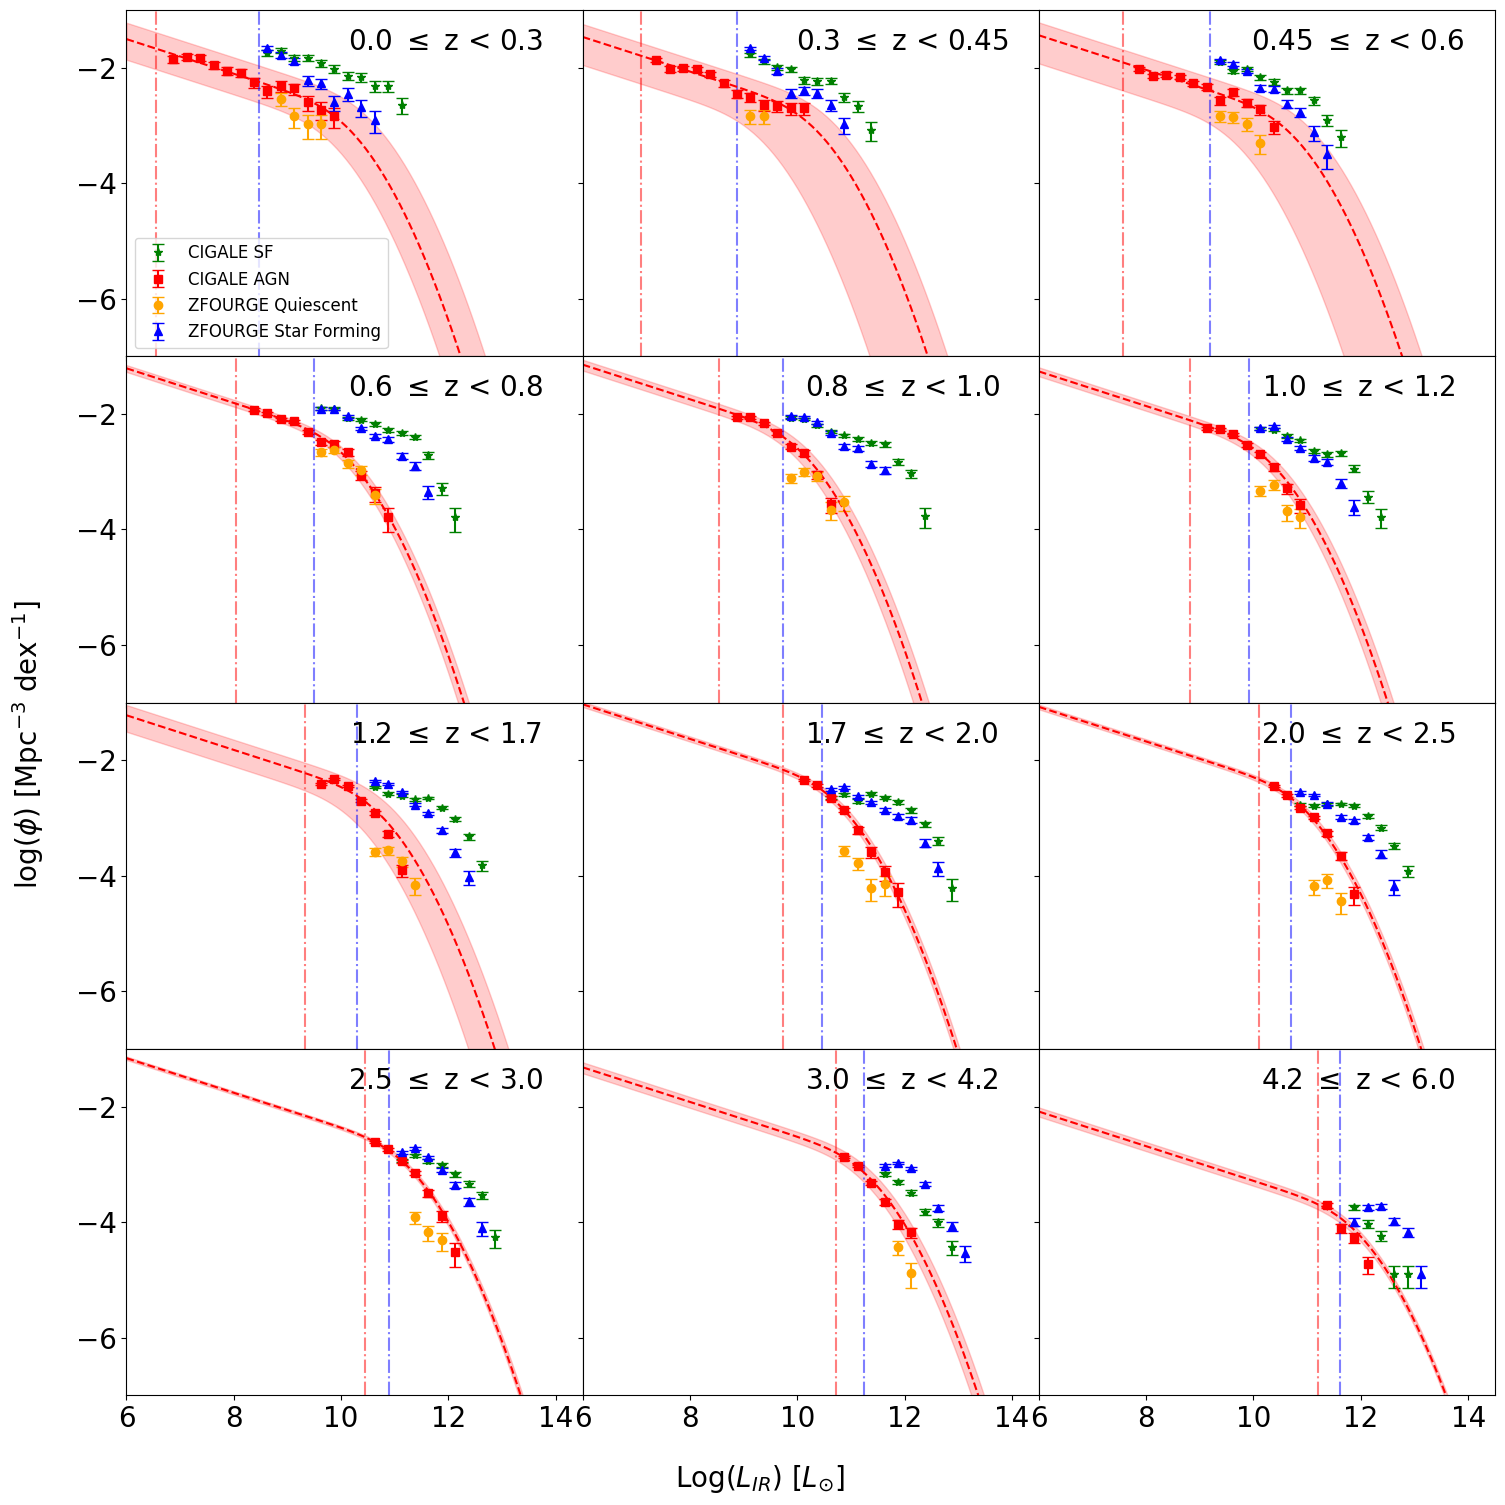

In [27]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

def schechter_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

""" CIGALE SF """
for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, CG_SF['x'], CG_SF['y'], CG_SF['e'], CG_SF['z'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='*', capsize=4, label='CIGALE SF' if i == 0 else '', color='green')
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7, fontsize=20)
    ax.set_xticks([6,8,10,12,14])
    ax.set_yticks([-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlim(6, 14.5)
    ax.set_ylim(-7, -1)

""" CIGALE AGN """
for i, (ax, l, p, e, min_l) in enumerate(zip(axes, CG_AGN['x'], CG_AGN['y'], CG_AGN['e'], CG_AGN['m'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='s', capsize=4, label='CIGALE AGN' if i == 0 else '', color='red')
    ax.axvline(np.log10(min_l/(3.83*10**26)), color='red', linestyle='-.', alpha=0.5, label='CIGALE AGN Completeness' if i == -1 else "")

""" ZFOURGE Quiescent """
for i, (ax, l, p, e, (z_start, z_end), min_l) in enumerate(zip(axes, ZF_QUI['x'], ZF_QUI['y'], ZF_QUI['e'], ZF_QUI['z'], ZF_QUI['m'])):
    try:
        yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    except TypeError:
        continue
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='o', capsize=4, label='ZFOURGE Quiescent' if i == 0 else '', color='orange')

""" ZFOURGE Star Forming """
for i, (ax, l, p, e, (z_start, z_end), min_l) in enumerate(zip(axes, ZF_SF['x'], ZF_SF['y'], ZF_SF['e'], ZF_SF['z'], ZF_SF['m'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='^', capsize=4, label='ZFOURGE Star Forming' if i == 0 else '', color='blue')
    ax.axvline(np.log10(min_l/(3.83*10**26)), color='blue', linestyle='-.', alpha=0.5, label='ZFOURGE Completeness' if i == -1 else "")
    
""" CIGALE SF Saunders Fit """
# for i, (ax, p, perr) in enumerate(zip(axes, CG_SF['saunder_p'], CG_SF['saunder_e'])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p)), label='Schechter Fit' if i == 1 else "", color='green', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(saunders_luminosity(l, *np.abs(p - perr))), 
#         np.log10(saunders_luminosity(l, *(p + perr))), 
#         color='green', alpha=0.2, label='Fit Error' if i == 1 else "")

""" CIGALE SF Schechter Fit """
# for i, (ax, p, perr) in enumerate(zip(axes, CG_SF['schech_p'], CG_SF['schech_e'])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *p)), label='Schechter Fit' if i == 1 else "", color='lime', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(schechter_luminosity(l, *np.abs(p - perr))), 
#         np.log10(schechter_luminosity(l, *(p + perr))), 
#         color='lime', alpha=0.2, label='Fit Error' if i == 1 else "")
    
""" CIGALE AGN Schechter Fit """
# for i, (ax, p, perr) in enumerate(zip(axes, CG_AGN['schech_p'], CG_AGN['schech_e'])):
#     l = np.logspace(6, 15, 100)
#     if p[0] is None:
#         continue
#     ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *p)), label='Schechter Fit' if i == 1 else "", color='red', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(schechter_luminosity(l, *np.abs(p - perr))), 
#         np.log10(schechter_luminosity(l, *(p + perr))), 
#         color='red', alpha=0.2, label='Fit Error' if i == 1 else "")

""" CIGALE AGN Saunders Fit """
for i, (ax, p, perr, sigma) in enumerate(zip(axes, CG_AGN['saunder_p'], CG_AGN['saunder_e'], CG_AGN['s'])):
    l = np.logspace(6, 15, 100)
    if p[0] is None:
        continue
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p, sigma)), label='Saunders Fit' if i == 1 else "", color='red', linestyle='--')
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *np.abs(p - perr), sigma)), 
        np.log10(saunders_luminosity(l, *(p + perr), sigma)), 
        color='red', alpha=0.2, label='Fit Error' if i == 1 else "")

""" ZFOURGE SF Fits """
# for i, (ax, p, perr) in enumerate(zip(axes, ZF_SF['saunder_p'], ZF_SF['saunder_e'])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p)), label='Saunders Fit' if i == 1 else "", color='blue', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(saunders_luminosity(l, *np.abs(p - perr))), 
#         np.log10(saunders_luminosity(l, *(p + perr))), 
#         color='blue', alpha=0.2, label='Fit Error' if i == 1 else "")

""" Models """
# files = ['fits/LF_IR/LF_IR_z0.15.dat', 'fits/LF_IR/LF_IR_z0.35.dat', 'fits/LF_IR/LF_IR_z0.55.dat', 'fits/LF_IR/LF_IR_z0.70.dat',
#          'fits/LF_IR/LF_IR_z0.90.dat', 'fits/LF_IR/LF_IR_z1.10.dat', 'fits/LF_IR/LF_IR_z1.50.dat', 'fits/LF_IR/LF_IR_z1.90.dat',
#          'fits/LF_IR/LF_IR_z2.20.dat', 'fits/LF_IR/LF_IR_z2.80.dat', 'fits/LF_IR/LF_IR_z3.60.dat', 'fits/LF_IR/LF_IR_z5.00.dat']
# for i, (file, ax) in enumerate(zip(files, axes)):
#     df = pd.read_csv(file, comment='#', header=None, delim_whitespace=True)
#     df.columns = ['log_LIR', 'Total', 'Warm_Starburst', 'Cold_Spiral', 'Type1_AGN', 
#         'Type2_AGN', 'Stellar_Spheroids', 'AGN_Spheroids', 
#         'Global_Spheroids', 'Lensed_Spheroids_Global']
    
#     log_LIR = df['log_LIR']
#     agn = 10**df['Type1_AGN'] + 10**df['Type2_AGN'] + 10**df['AGN_Spheroids']
#     stellar = 10**df['Warm_Starburst'] + 10**df['Cold_Spiral'] + 10**df['Stellar_Spheroids']
    
#     ax.plot(log_LIR, np.log10(agn), label='Model AGN' if i == 2 else "", color='red', linestyle='dotted')
#     ax.plot(log_LIR, np.log10(stellar), label='Model Stellar' if i == 2 else "", color='green', linestyle='dotted')

axes[0].legend(loc='lower left', fontsize=12)
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
if export:
    plt.savefig('LF_decomp.png', dpi=300)
plt.show()

# $0.6 \leq z < 0.8$ -- One Plot

In [ ]:
z = ZF_ALL['z']
one_plots = [0] # Redshift bins to plot
l = np.logspace(6, 15, 100)

# Rodighiero
for i, one_plot in enumerate(one_plots):
    if one_plot in [0,1,2,3,4,5,6,7,8]:
        plt.scatter(R_L[one_plot], R_P[one_plot], color='goldenrod', marker='*', label='Rodighiero+10' if i == 0 else '')
        
    # Gruppioni
    if one_plot in [0,1,2,3,4,5,6,7,8,9,10]:
        plt.scatter(G_L[one_plot], G_P[one_plot], color='purple', marker='x', label='Gruppioni+13' if i == 0 else '')

    # Fu 0.6 < z < 0.8
    if one_plot == 3:
        plt.scatter(x=[11.60, 11.75, 11.90, 12.05, 12.20, 12.35, 12.50, 12.80], y=[-2.83, -3.08, -3.44, -3.78, -4.38, -4.66, -5.43, -5.43], label='Fu+10', marker='D', color='lime')

    # CIGALE SF
    yerr=[np.log10(CG_SF['y'][one_plot]) - np.log10(CG_SF['y'][one_plot] - CG_SF['e'][one_plot]), np.log10(CG_SF['y'][one_plot] + CG_SF['e'][one_plot]) - np.log10(CG_SF['y'][one_plot])]
    plt.errorbar(CG_SF['x'][one_plot], np.log10(CG_SF['y'][one_plot]), yerr=yerr, ls='none', marker='*', capsize=4, label='CIGALE SF' if i == 0 else '', color='green')

    """ CIGALE AGN Saunders Fit """
    # yerr=[np.log10(CG_AGN['y'][one_plot]) - np.log10(CG_AGN['y'][one_plot] - CG_AGN['e'][one_plot]), np.log10(CG_AGN['y'][one_plot] + CG_AGN['e'][one_plot]) - np.log10(CG_AGN['y'][one_plot])]
    # plt.errorbar(CG_AGN['x'][one_plot], np.log10(CG_AGN['y'][one_plot]), yerr=yerr, ls='none', marker='s', capsize=4, label='CIGALE AGN' if i == 0 else '', color='red')
    # plt.plot(np.log10(l), np.log10(saunders_luminosity(l, *CG_AGN['saunder_p'][one_plot])), label='Saunders Fit' if i == 0 else '', color='red', linestyle='--')
    # plt.fill_between(np.log10(l),
    #     np.log10(saunders_luminosity(l, *CG_AGN['saunder_p'][one_plot] - CG_AGN['saunder_e'][one_plot])),
    #     np.log10(saunders_luminosity(l, *CG_AGN['saunder_p'][one_plot] + CG_AGN['saunder_e'][one_plot])),
    #     color='red', alpha=0.2)
    
    # CIGALE AGN Schechter Fit
    yerr=[np.log10(CG_AGN['y'][one_plot]) - np.log10(CG_AGN['y'][one_plot] - CG_AGN['e'][one_plot]), np.log10(CG_AGN['y'][one_plot] + CG_AGN['e'][one_plot]) - np.log10(CG_AGN['y'][one_plot])]
    plt.errorbar(CG_AGN['x'][one_plot], np.log10(CG_AGN['y'][one_plot]), yerr=yerr, ls='none', marker='s', capsize=4, label='CIGALE AGN' if i == 0 else '', color='red')
    plt.plot(np.log10(l), np.log10(schechter_luminosity(l, *CG_AGN['schech_p'][one_plot])), label='Schechter Fit' if i == 0 else '', color='red', linestyle='--')
    plt.fill_between(np.log10(l),
        np.log10(schechter_luminosity(l, *np.abs(CG_AGN['schech_p'][one_plot] - CG_AGN['schech_e'][one_plot]))),
        np.log10(schechter_luminosity(l, *(CG_AGN['schech_p'][one_plot] + CG_AGN['schech_e'][one_plot]))),
        color='red', alpha=0.2)

    # ZFOURGE QUI
    yerr=[np.log10(ZF_QUI['y'][one_plot]) - np.log10(ZF_QUI['y'][one_plot] - ZF_QUI['e'][one_plot]), np.log10(ZF_QUI['y'][one_plot] + ZF_QUI['e'][one_plot]) - np.log10(ZF_QUI['y'][one_plot])]
    plt.errorbar(ZF_QUI['x'][one_plot], np.log10(ZF_QUI['y'][one_plot]), yerr=yerr, ls='none', marker='o', capsize=4, label='ZFOURGE Quiescent' if i == 0 else '', color='orange')

    # ZFOURGE TOTAL
    yerr=[np.log10(ZF_ALL['y'][one_plot]) - np.log10(ZF_ALL['y'][one_plot] - ZF_ALL['e'][one_plot]), np.log10(ZF_ALL['y'][one_plot] + ZF_ALL['e'][one_plot]) - np.log10(ZF_ALL['y'][one_plot])]
    plt.errorbar(ZF_ALL['x'][one_plot], np.log10(ZF_ALL['y'][one_plot]), yerr=yerr, ls='none', marker='o', capsize=4, label='ZFOURGE Total' if i == 0 else '', color='C0')
    plt.axvline(ZF_ALL['m'][one_plot], color='blue', linestyle='-.', alpha=0.5, label='Completeness' if i == 0 else '') # min LIR
    plt.plot(np.log10(l), np.log10(saunders_luminosity(l, *ZF_ALL['saunder_p'][one_plot], ZF_ALL['s'][one_plot])), label='Saunders Fit' if i == 0 else '', color='blue', linestyle='--') # Saunders Fit
    plt.fill_between(np.log10(l),
        np.log10(saunders_luminosity(l, *np.abs(ZF_ALL['saunder_p'][one_plot] - ZF_ALL['saunder_e'][one_plot]), ZF_ALL['s'][one_plot])),
        np.log10(saunders_luminosity(l, *(ZF_ALL['saunder_p'][one_plot] + ZF_ALL['saunder_e'][one_plot]), ZF_ALL['s'][one_plot])),
        color='blue', alpha=0.2)
    plt.title(f'{z[one_plot][0]} $\leq$ z < {z[one_plot][1]}', y=0.86, x=0.7, fontsize=20)
    
# plt.text(7.5, -3, '$0 \leq z < 0.3$', color='black', fontsize=12)
# plt.text(11.5, -3, '$4.2 \leq z < 6.0$', color='black', fontsize=12)
plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
plt.xlabel('Log($L_{IR}$) [$L_{\odot}$]', fontsize=20)
plt.xlim(6, 14)
plt.ylim(-7.5, -1)
plt.tick_params(axis='both', labelsize=20)
plt.legend(loc='lower left', fontsize=12, bbox_to_anchor=(1, 0.1))
plt.show()

# Parameter Evolution

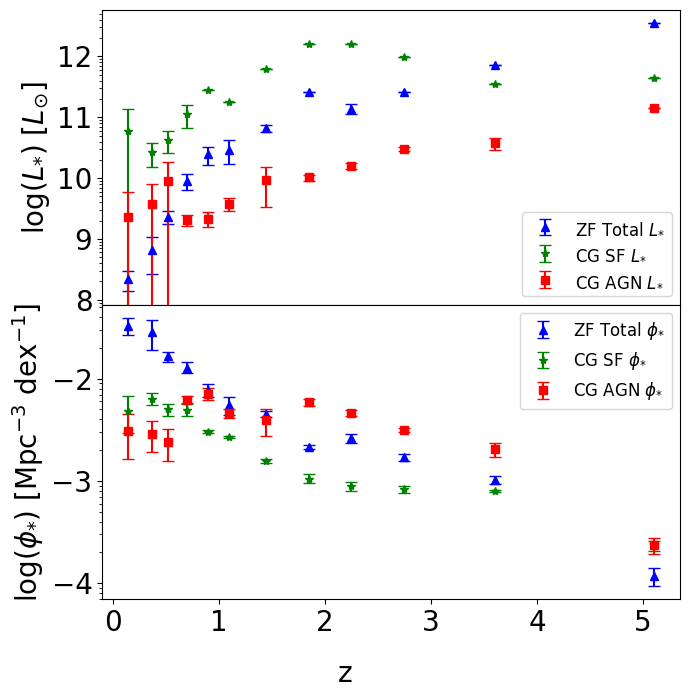

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
redshift_centers = np.mean(ZF_ALL['z'], axis=1)

""" ZFOURGE Lstar """
ZF_LSTAR_params = ZF_ALL['saunder_p'][:,0].astype(float)
ZF_LSTAR_errors = ZF_ALL['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, ZF_LSTAR_params, yerr=ZF_LSTAR_errors, ls='none', capsize=4, marker='^', label='ZF Total $L_{*}$', color='blue')

""" ZFOURGE Phistar """
ZF_PHISTAR_params = ZF_ALL['saunder_p'][:,1].astype(float)
ZF_PHISTAR_errors = ZF_ALL['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, ZF_PHISTAR_params, yerr=ZF_PHISTAR_errors, ls='none', capsize=4, marker='^', label='ZF Total $\phi_{*}$', color='blue')

""" ZFOURGE SF Lstar """
# ZF_SF_LSTAR_params = ZF_SF['saunder_p'][:,0].astype(float)
# ZF_SF_LSTAR_errors = ZF_SF['saunder_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, ZF_SF_LSTAR_params, yerr=ZF_SF_LSTAR_errors, ls='none', capsize=4, marker='o', label='ZF SF $L_{*}', color='blue')

""" ZFOURGE SF Phistar """
# ZF_SF_PHISTAR_params = ZF_SF['saunder_p'][:,1].astype(float)
# ZF_SF_PHISTAR_errors = ZF_SF['saunder_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, ZF_SF_PHISTAR_params, yerr=ZF_SF_PHISTAR_errors, ls='none', capsize=4, marker='o', label='ZF SF $\phi_{*}', color='blue')

""" CIGALE SF Lstar Schechter """
# CG_SF_LSTAR_params = CG_SF['schech_p'][:,0].astype(float)
# CG_SF_LSTAR_errors = CG_SF['schech_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, CG_SF_LSTAR_params, yerr=CG_SF_LSTAR_errors, ls='none', capsize=4, marker='*', label='CG SF $L_{*}$', color='green')

""" CIGALE SF Phistar Schechter """
# CG_SF_PHISTAR_params = CG_SF['schech_p'][:,1].astype(float)
# CG_SF_PHISTAR_errors = CG_SF['schech_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, CG_SF_PHISTAR_params, yerr=CG_SF_PHISTAR_errors, ls='none', capsize=4, marker='*', label='CG SF $\phi_{*}$', color='green')

""" CIGALE SF Lstar Saunders """
CG_SF_LSTAR_params = CG_SF['saunder_p'][:,0].astype(float)
CG_SF_LSTAR_errors = CG_SF['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, CG_SF_LSTAR_params, yerr=CG_SF_LSTAR_errors, ls='none', capsize=4, marker='*', label='CG SF $L_{*}$', color='green')

""" CIGALE SF Phistar Saunders """
CG_SF_PHISTAR_params = CG_SF['saunder_p'][:,1].astype(float)
CG_SF_PHISTAR_errors = CG_SF['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, CG_SF_PHISTAR_params, yerr=CG_SF_PHISTAR_errors, ls='none', capsize=4, marker='*', label='CG SF $\phi_{*}$', color='green')

# """ CIGALE AGN Lstar Schechter """
# CG_AGN_LSTAR_params = CG_AGN['schech_p'][:,0].astype(float)
# CG_AGN_LSTAR_errors = CG_AGN['schech_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, CG_AGN_LSTAR_params, yerr=CG_AGN_LSTAR_errors, ls='none', capsize=4, marker='s', label='CG AGN $L_{*}$', color='red')

# """ CIGALE AGN Phistar Schechter """
# CG_AGN_PHISTAR_params = CG_AGN['schech_p'][:,1].astype(float)
# CG_AGN_PHISTAR_errors = CG_AGN['schech_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, CG_AGN_PHISTAR_params, yerr=CG_AGN_PHISTAR_errors, ls='none', capsize=4, marker='s', label='CG AGN $\phi_{*}$', color='red')

""" CIGALE AGN Lstar Saunders """
CG_AGN_LSTAR_params = CG_AGN['saunder_p'][:,0].astype(float)
CG_AGN_LSTAR_errors = CG_AGN['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, CG_AGN_LSTAR_params, yerr=CG_AGN_LSTAR_errors, ls='none', capsize=4, marker='s', label='CG AGN $L_{*}$', color='red')

""" CIGALE AGN Phistar Saunders """
CG_AGN_PHISTAR_params = CG_AGN['saunder_p'][:,1].astype(float)
CG_AGN_PHISTAR_errors = CG_AGN['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, CG_AGN_PHISTAR_params, yerr=CG_AGN_PHISTAR_errors, ls='none', capsize=4, marker='s', label='CG AGN $\phi_{*}$', color='red')

ax[0].set_yscale('log')
ax[0].yaxis.set_major_formatter(LogFormatterExponent(base=10))
ax[0].legend(loc='lower right', fontsize=12)
ax[0].set_ylabel('log$(L_{*})$ [$L_{\odot}$]', fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)

ax[1].set_yscale('log')
ax[1].yaxis.set_major_formatter(LogFormatterExponent(base=10))
ax[1].legend(loc='upper right', fontsize=12)
ax[1].set_ylabel('log$(\phi_{*})$ [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)

fig.supxlabel('z', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
if export:
    plt.savefig('param_evo.png', dpi=300)
plt.show()

# Star Formation Rate Density

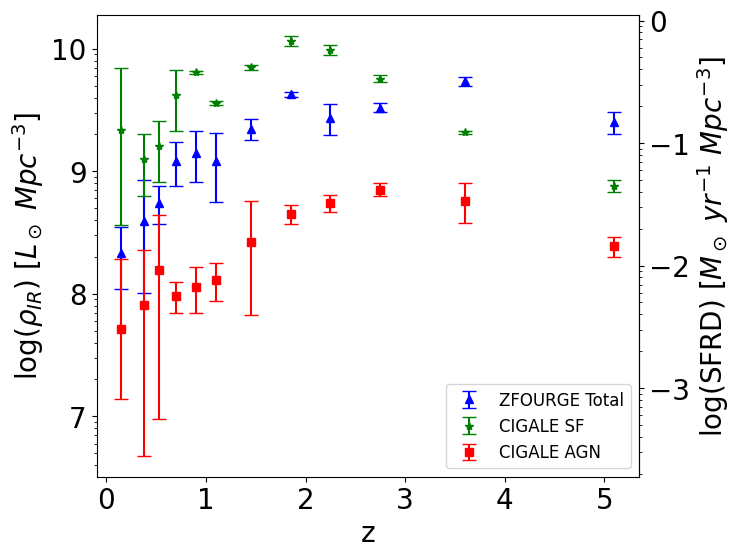

In [29]:
lower_bound = 10**8
upper_bound = 10**14
redshift_centers = np.mean(ZF_ALL['z'], axis=1)
fig, ax = plt.subplots(figsize=(7, 6))

def kennicutt_sfr(rho_ir):
    return rho_ir / (1.7*10**10)

def inverse_kennicutt_sfr(sfr):
    return sfr * 1.7*10**10

def saunder_area(params, perrors, lower_bound, upper_bound, sigmas):
    results_area = []
    for param, perr, sigma in zip(params, perrors, sigmas):
        param = np.append(param, sigma)
        perr = np.append(perr, 0)
        area, _ = integrate.quad(saunders_luminosity, lower_bound, upper_bound, args=tuple(param))
        area_up, _ = integrate.quad(saunders_luminosity, lower_bound, upper_bound, args=tuple(param+perr))
        area_down, _ = integrate.quad(saunders_luminosity, lower_bound, upper_bound, args=tuple(np.abs(param-perr)))
        results_area.append([area, area_up-area, area-area_down])

    results_area = np.array(results_area)
    area = results_area[:,0]
    area_up = results_area[:,1]
    area_down = results_area[:,2]
    return area, area_up, area_down

def schehcter_area(params, perrors, lower_bound, upper_bound):
    results_area = []
    for param, perr in zip(params, perrors):
        area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=tuple(param))
        area_up, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=tuple(param+perr))
        area_down, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=tuple(np.abs(param-perr)))
        results_area.append([area, area_up-area, area-area_down])

    results_area = np.array(results_area)
    area = results_area[:,0]
    area_up = results_area[:,1]
    area_down = results_area[:,2]
    return area, area_up, area_down

# ZFOURGE Total
ZF_params = ZF_ALL['saunder_p'].astype(float)
ZF_perr = ZF_ALL['saunder_e'].astype(float)
ZF_sigmas = ZF_ALL['s'].astype(float)
area, area_up, area_down = saunder_area(ZF_params, ZF_perr, lower_bound, upper_bound, ZF_sigmas)
ax.errorbar(redshift_centers, area, yerr=[area_down, area_up], ls='none', capsize=5, marker='^', label='ZFOURGE Total', color='blue')

# CIAGLE SF
CG_SF_params = CG_SF['saunder_p'].astype(float)
CG_SF_perr = CG_SF['saunder_e'].astype(float)
CG_SF_sigmas = CG_SF['s'].astype(float)
area, area_up, area_down = saunder_area(CG_SF_params, CG_SF_perr, lower_bound, upper_bound, CG_SF_sigmas)
# print(area_down)
ax.errorbar(redshift_centers, area, yerr=[area_down, area_up], ls='none', capsize=5, marker='*', label='CIGALE SF', color='green')

# CIAGLE AGN
CG_AGN_params = CG_AGN['saunder_p'].astype(float)
CG_AGN_perr = CG_AGN['saunder_e'].astype(float)
CG_AGN_sigmas = CG_AGN['s'].astype(float)
area, area_up, area_down = saunder_area(CG_AGN_params, CG_AGN_perr, lower_bound, upper_bound, CG_SF_sigmas)
ax.errorbar(redshift_centers, area, yerr=[area_down, area_up], ls='none', capsize=5, marker='s', label='CIGALE AGN', color='red')

# Luminosity Density
ax.set_ylabel(r'log($\rho_{IR}$) [$L_\odot$ $Mpc^{-3}$]', fontsize=20)
ax.set_yscale('log', nonpositive='clip')
ax.set_xlabel('z', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.yaxis.set_major_formatter(LogFormatterExponent(base=10))

# SFRD Secondary Axis
secax = ax.secondary_yaxis('right', functions=(kennicutt_sfr, inverse_kennicutt_sfr))
secax.set_ylabel('log(SFRD) [$M_\odot$ $yr^{-1}$ $Mpc^{-3}$]', fontsize=20)
secax.yaxis.set_major_formatter(LogFormatterExponent(base=10))
secax.tick_params(labelsize=20)
plt.legend(loc='lower right', fontsize=12)
if export:
    plt.savefig('sfrd.png', dpi=300)
plt.show()

# Class Evolution

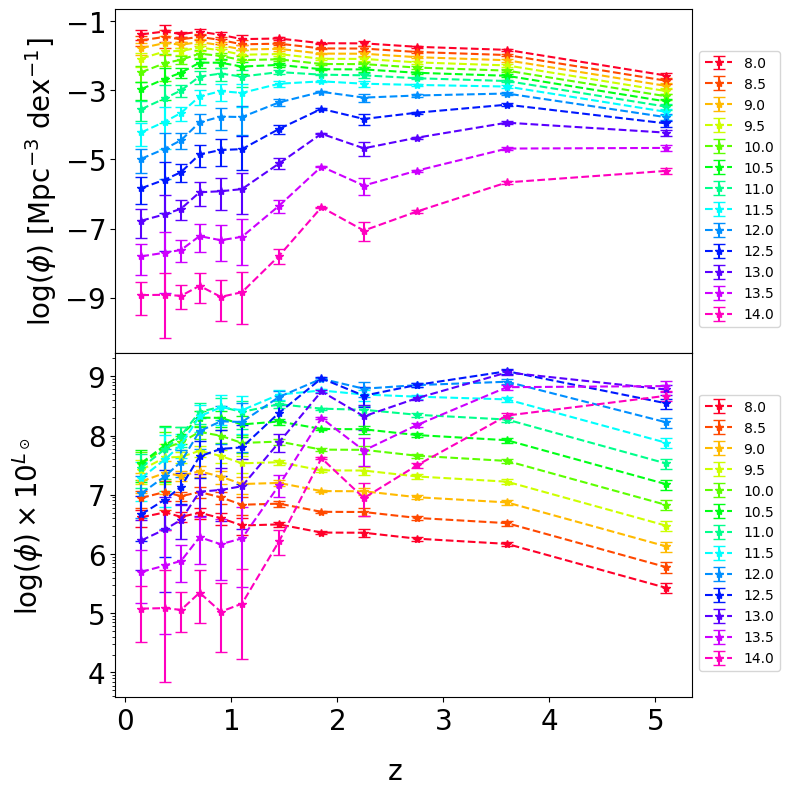

In [30]:
luminosity_classes = np.arange(8, 14.5, 0.5)
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_classes)))
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
from matplotlib.ticker import FuncFormatter

def custom_log_formatter(val, pos):
    # Convert the logarithmic value to an exponent
    exponent = int(np.log10(val))
    return f'${exponent}$'

class_phi = []
for lum in luminosity_classes:
    lum_phi = []
    for params, perr, sigma in zip(ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['s']):
    # for params, perr in zip(CG_ALL['saunder_p'], CG_ALL['saunder_e']):
    # for params, perr in zip(CG_SF['saunder_p'], CG_SF['saunder_e']):
    # for params, perr in zip(CG_AGN['saunder_p'], CG_AGN['saunder_e']):
        if params[0] is None:
            lum_phi.append([np.nan, np.nan, np.nan])
            continue
        phi = saunders_luminosity(10**lum, *params, sigma)
        phi_up = saunders_luminosity(10**lum, *(params+perr), sigma)
        phi_down = saunders_luminosity(10**lum, *(params-perr), sigma)
        # phi = schechter_luminosity(10**lum, *params)
        # phi_up = schechter_luminosity(10**lum, *(params+perr))
        # phi_down = schechter_luminosity(10**lum, *(params-perr))
        lum_phi.append([phi, phi_up-phi, phi-phi_down])
    class_phi.append(lum_phi)

for lum, lclass, c in zip(luminosity_classes, class_phi, colors):
    class_lum = np.array(lclass)
    phi = class_lum[:,0]
    phi_up = class_lum[:,1]
    phi_down = class_lum[:,2]
    ax[0].errorbar(redshift_centers, phi, yerr=[phi_down, phi_up], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
    ax[1].errorbar(redshift_centers, phi*10**lum, yerr=[phi_down*10**lum, phi_up*10**lum], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
    
ax[0].legend(bbox_to_anchor=(1,0.9))
ax[0].set_yscale('log')
ax[0].yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
ax[0].set_ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)

ax[1].tick_params(axis='both', labelsize=20)
ax[1].set_yscale('log')
ax[1].yaxis.set_major_formatter(LogFormatterExponent(base=10))
ax[1].legend(bbox_to_anchor=(1,0.9))
ax[1].set_ylabel(r'log($\phi) \times 10^{L_\odot}$', fontsize=20, labelpad=30)

fig.supxlabel('z', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
# if export:
#     plt.savefig('class_evo.png', dpi=300)
plt.show()

[1.1 1.0 0.9 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]


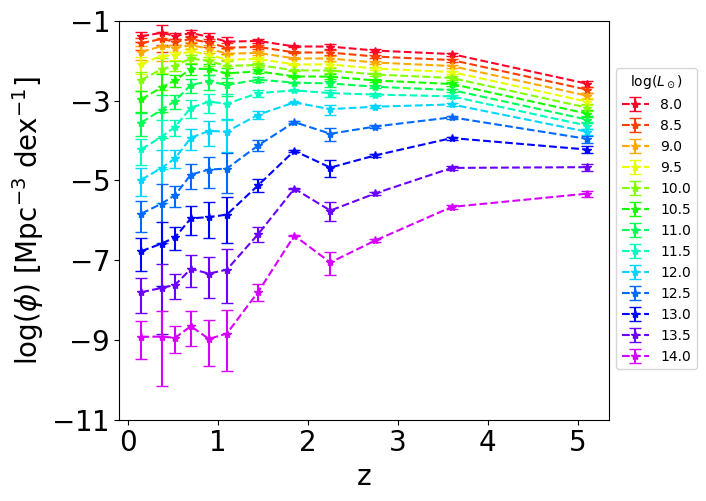

In [31]:
luminosity_classes = np.arange(8, 14.5, 0.5)
colors = plt.cm.gist_rainbow(np.linspace(0,1,14))
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(7, 5))
print(ZF_ALL['s'])

def custom_log_formatter(val, pos):
    # Convert the logarithmic value to an exponent
    exponent = int(np.log10(val))
    return f'${exponent}$'

class_phi = []
for lum in luminosity_classes:
    lum_phi = []
    for params, perr, sigma in zip(ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['s']):
    # for params, perr in zip(CG_SF['schech_p'], CG_SF['schech_e']):
    # for params, perr in zip(CG_AGN['schech_p'], CG_AGN['schech_e']):
        if params[0] is None:
            lum_phi.append([np.nan, np.nan, np.nan])
            continue
        phi = saunders_luminosity(10**lum, *params, sigma)
        phi_up = saunders_luminosity(10**lum, *(params+perr), sigma)
        phi_down = saunders_luminosity(10**lum, *(params-perr), sigma)
        # phi = schechter_luminosity(10**lum, *params)
        # phi_up = schechter_luminosity(10**lum, *(params+perr))
        # phi_down = schechter_luminosity(10**lum, *(params-perr))
        lum_phi.append([phi, phi_up-phi, phi-phi_down])
    class_phi.append(lum_phi)

for lum, lclass, c in zip(luminosity_classes, class_phi, colors):
    class_lum = np.array(lclass)
    phi = class_lum[:,0]
    phi_up = class_lum[:,1]
    phi_down = class_lum[:,2]
    plt.errorbar(redshift_centers, phi, yerr=[phi_down, phi_up], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
    
plt.legend(bbox_to_anchor=(1,0.9), title='log($L_\odot$)')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
plt.xlabel('z', fontsize=20)
plt.xticks([0,1,2,3,4,5])
plt.tick_params(axis='both', labelsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.ylim(10**-11, 10**-1)
# if export:
#     plt.savefig('class_evo.png', dpi=300)
plt.show()

## Luminosity-Redshift Distribution

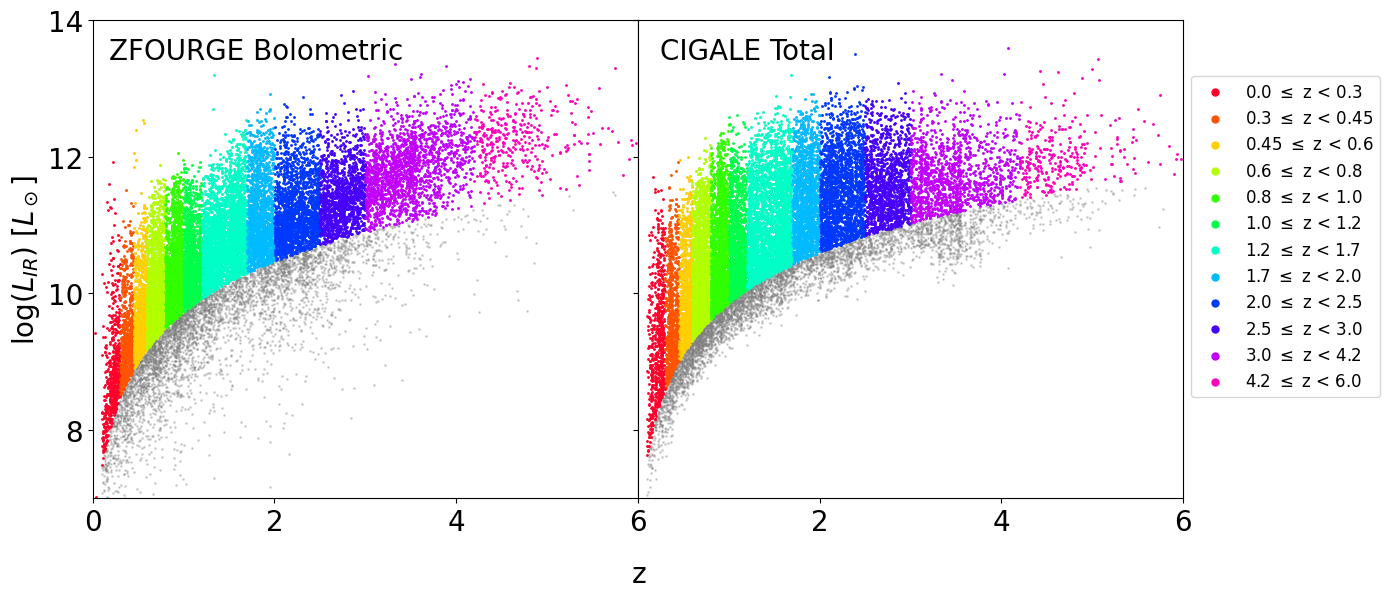

In [32]:
lir_vs_z_zf = np.load('fits/LIR_vs_z_ZF.npz', allow_pickle=True)
lir_vs_z_cg = np.load('fits/LIR_vs_z_CG.npz', allow_pickle=True)
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = plt.cm.gist_rainbow(np.linspace(0,1,len(lir_vs_z_zf['z_bins'])))

ax[0].scatter(lir_vs_z_zf['z'], lir_vs_z_zf['lum'], s=1, color='grey', alpha=0.3)
ax[0].set_title('ZFOURGE Bolometric', x=0.3, y=0.9, fontsize=20)
for (z_start, z_end), z, lum, c in zip(lir_vs_z_zf['z_bins'], lir_vs_z_zf['z_corr'], lir_vs_z_zf['lum_corr'], colors):
    ax[0].scatter(z, lum, s=1, label=f'{z_start} $\leq$ z < {z_end}', color=c)

ax[1].scatter(lir_vs_z_cg['z'], lir_vs_z_cg['lum'], s=1, color='grey', alpha=0.3)
ax[1].set_title('CIGALE Total', x=0.2, y=0.9, fontsize=20)
for (z_start, z_end), z, lum, c in zip(lir_vs_z_cg['z_bins'], lir_vs_z_cg['z_corr'], lir_vs_z_cg['lum_corr'], colors):
    ax[1].scatter(z, lum, s=1, label=f'{z_start} $\leq$ z < {z_end}', color=c)

ax[0].tick_params(axis='both', labelsize=20)
ax[0].set_ylabel('log($L_{IR}$) [$L_\odot$]', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(bbox_to_anchor=(1,0.9), markerscale=5, fontsize=12)
ax[1].set_ylim(7, 14)
ax[1].set_yticks([8,10,12,14])
ax[0].set_xlim(0, 6)
ax[1].set_xlim(0, 6)
ax[0].set_xticks([0,2,4,6])
ax[1].set_xticks([2,4,6])

fig.supxlabel('z', fontsize=20, x=0.46)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
if export:
    plt.savefig('LIR_vs_z.png', dpi=300)
plt.show()

### "This Work" One Plot

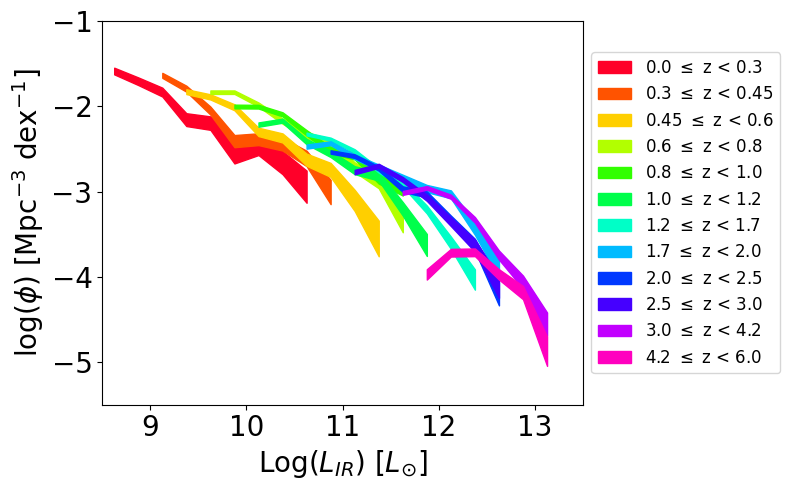

In [33]:
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(ZF_ALL['z'])))
plt.figure(figsize=(8, 5))

for i, (l, p, e, z, c) in enumerate(zip(ZF_ALL['x'], ZF_ALL['y'], ZF_ALL['e'], ZF_ALL['z'], colors)):
    p_down = np.log10(p - e)
    p_up = np.log10(p + e)
    plt.fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}', color=c)

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", fontsize=12)
plt.xlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0.05, fontsize=20)
plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0.05, fontsize=20)
plt.xlim(8.5, 13.5)
plt.ylim(-5.5, -1)
plt.yticks([-5,-4,-3,-2,-1], fontsize=20)
plt.xticks(fontsize=20)
plt.tight_layout()
if export:
    plt.savefig('bolo_lf_fill.png', dpi=300)
plt.show()

C:\Users\n10480129\AppData\Local\Temp\ipykernel_19116\846816358.py:10: RuntimeWarning: divide by zero encountered in scalar power
  return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)
C:\Users\n10480129\AppData\Local\Temp\ipykernel_19116\846816358.py:70: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


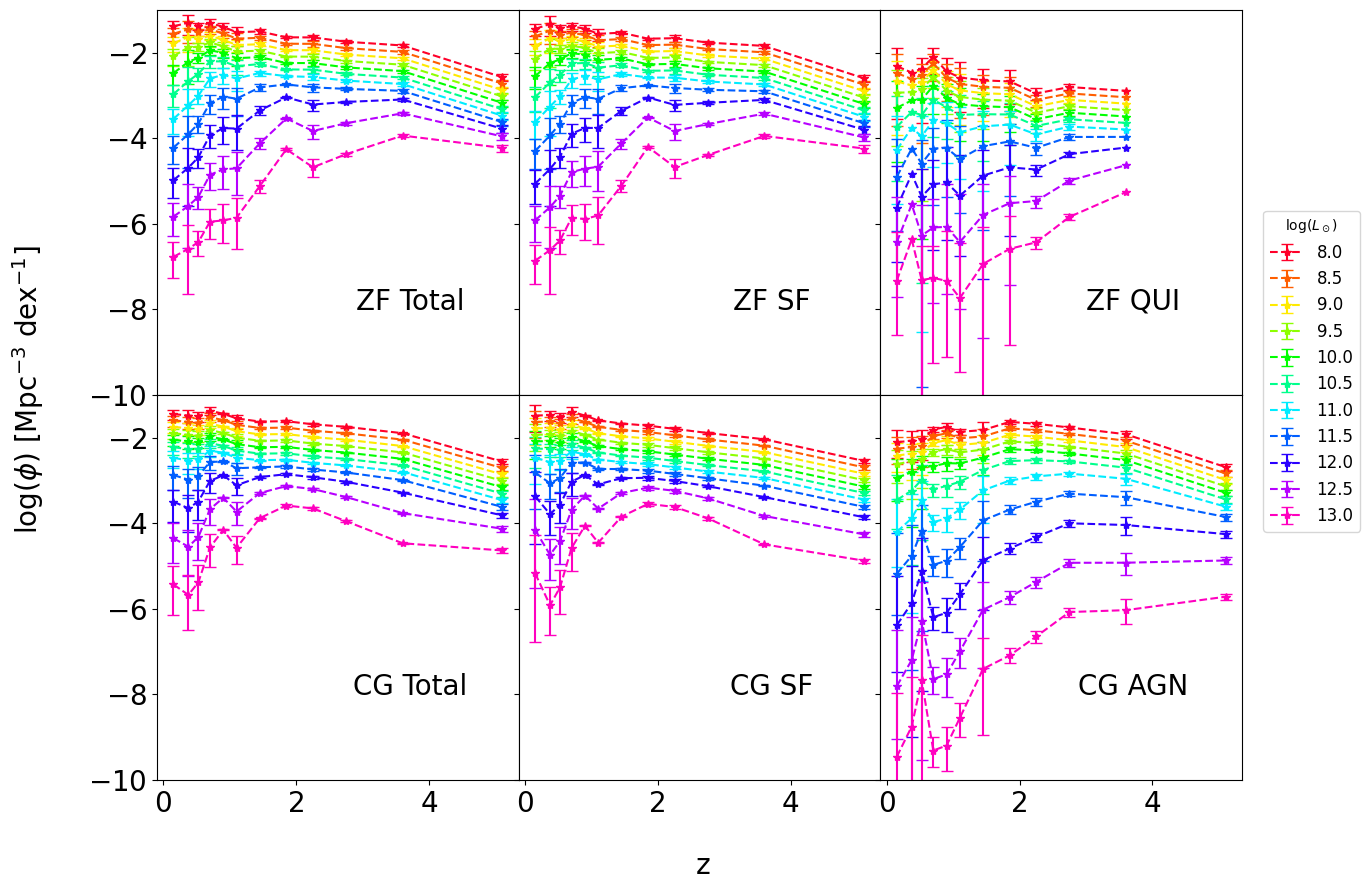

In [34]:
from matplotlib.ticker import FuncFormatter
luminosity_classes = np.arange(8, 13.5, 0.5)
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_classes)))
redshift_centers = np.mean(ZF_ALL['z'], axis=1)

def schechter_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

def saunders_luminosity(L, L_star, phi_star, sigma):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

def custom_log_formatter(val, pos):
    """ Convert the logarithmic value to an exponent """
    exponent = int(np.log10(val))
    return f'${exponent}$'

def class_saunder_phi(file, luminosity_classes):
    class_phi = []
    for lum in luminosity_classes:
        lum_phi = []
        for params, perr, sigma in zip(file['saunder_p'], file['saunder_e'], file['s']):
            if len(params) == 0:
                lum_phi.append([np.nan, np.nan, np.nan])
                continue
            phi = saunders_luminosity(10**lum, *params, sigma)
            phi_up = saunders_luminosity(10**lum, *(params+perr), sigma)
            phi_down = saunders_luminosity(10**lum, *(np.abs(params-perr)), sigma)
            lum_phi.append([phi, np.abs(phi_up-phi), np.abs(phi-phi_down)])
        class_phi.append(lum_phi)
    return class_phi

def plot_class_evo(ax, luminosity_classes, class_phi, colors):
    for lum, lclass, c in zip(luminosity_classes, class_phi, colors):
        class_lum = np.array(lclass)
        phi = class_lum[:,0]
        phi_up = class_lum[:,1]
        phi_down = class_lum[:,2]
        ax.errorbar(redshift_centers, phi, yerr=[phi_down, phi_up], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
        ax.tick_params(axis='both', labelsize=20)

fig, ax = plt.subplots(2, 3, figsize=(14, 10), sharex=True, sharey=True)
ax = ax.flatten()

# ZFOURGE
class_evo_ZF_all = class_saunder_phi(ZF_ALL, luminosity_classes)
class_evo_ZF_SF = class_saunder_phi(ZF_SF, luminosity_classes)
class_evo_ZF_QUI = class_saunder_phi(ZF_QUI, luminosity_classes)
plot_class_evo(ax[0], luminosity_classes, class_evo_ZF_all, colors)
plot_class_evo(ax[1], luminosity_classes, class_evo_ZF_SF, colors)
plot_class_evo(ax[2], luminosity_classes, class_evo_ZF_QUI, colors)

# CIGALE
class_evo_CG_all = class_saunder_phi(CG_ALL, luminosity_classes)
class_evo_CG_SF = class_saunder_phi(CG_SF, luminosity_classes)
class_evo_CG_AGN = class_saunder_phi(CG_AGN, luminosity_classes)
plot_class_evo(ax[3], luminosity_classes, class_evo_CG_all, colors)
plot_class_evo(ax[4], luminosity_classes, class_evo_CG_SF, colors)
plot_class_evo(ax[5], luminosity_classes, class_evo_CG_AGN, colors)

titles = ['ZF Total', 'ZF SF', 'ZF QUI', 'CG Total', 'CG SF', 'CG AGN']
for axes, title in zip(ax, titles):
    axes.set_title(title, y=0.2, x=0.7, fontsize=20)
ax[0].set_ylim(10**-10, 10**-1)
ax[0].set_yscale('log')
ax[0].yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
ax[0].legend(title='log($L_\odot$)', fontsize=12, bbox_to_anchor=(3.35, 0.5))
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
fig.supxlabel('z', fontsize=20, x=0.515)
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
if export:
    plt.savefig('class_evo_ALL.png', dpi=300, bbox_inches="tight")
plt.show()